In [1]:
import os
import hashlib
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    PolynomialFeatures,
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
df = pd.read_csv("student_performance_prediction.csv")

In [3]:
df

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No


In [4]:
df.drop(columns=["Student ID"], axis=1, inplace=True)

In [5]:
df["Participation in Extracurricular Activities"].unique()

array(['Yes', 'No', nan], dtype=object)

In [6]:
df["Participation in Extracurricular Activities"] = df["Participation in Extracurricular Activities"].map({"No": 0, "Yes": 1})

In [7]:
df["Parent Education Level"].unique()

array(['Master', 'High School', 'Associate', 'Bachelor', 'Doctorate', nan],
      dtype=object)

In [11]:
categories = [
    'High School',
    'Associate',
    'Bachelor',
    'Master',
    'Doctorate',
]

encoder = OrdinalEncoder(categories=[categories], handle_unknown="use_encoded_value", unknown_value=np.nan)
df[["Parent Education Level"]] = encoder.fit_transform(df[["Parent Education Level"]])

In [12]:
df.isnull().sum()

Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [13]:
df

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,12.5,NaN,75.0,1.0,3.0,Yes
1,9.3,95.3,60.6,0.0,0.0,No
2,13.2,NaN,64.0,0.0,1.0,No
3,17.6,76.8,62.4,1.0,2.0,No
4,8.8,89.3,72.7,0.0,3.0,No
...,...,...,...,...,...,...
39995,15.6,93.8,51.4,1.0,3.0,No
39996,11.3,66.4,64.2,0.0,4.0,Yes
39997,13.1,65.6,38.1,0.0,2.0,No
39998,14.1,74.9,NaN,1.0,3.0,No


In [15]:
df.dropna(subset=["Passed"], inplace=True)

In [16]:
df.isnull().sum()

Study Hours per Week                           1905
Attendance Rate                                1888
Previous Grades                                1877
Participation in Extracurricular Activities    1902
Parent Education Level                         1898
Passed                                            0
dtype: int64

<Axes: >

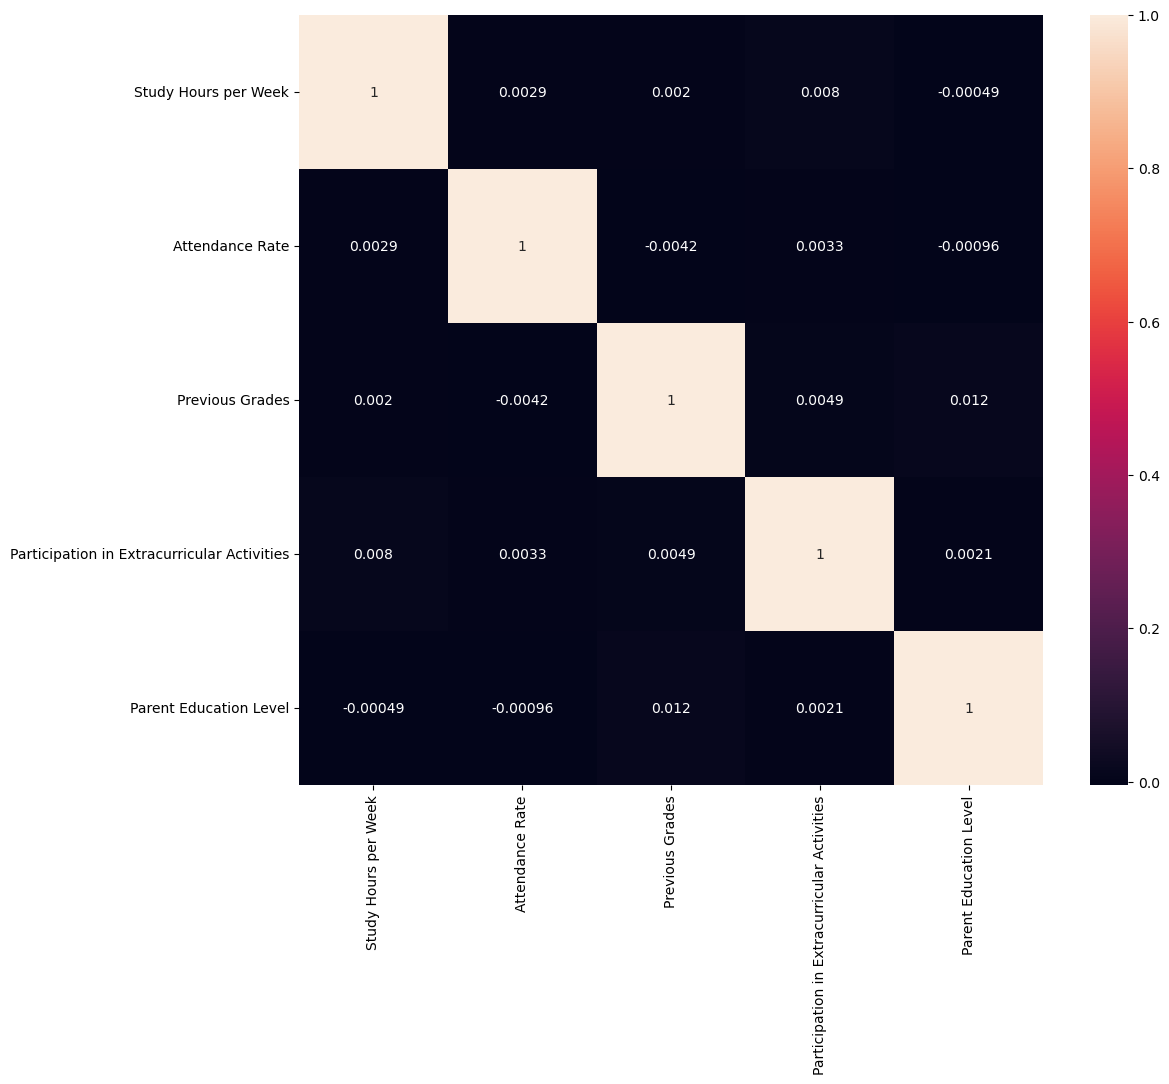

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

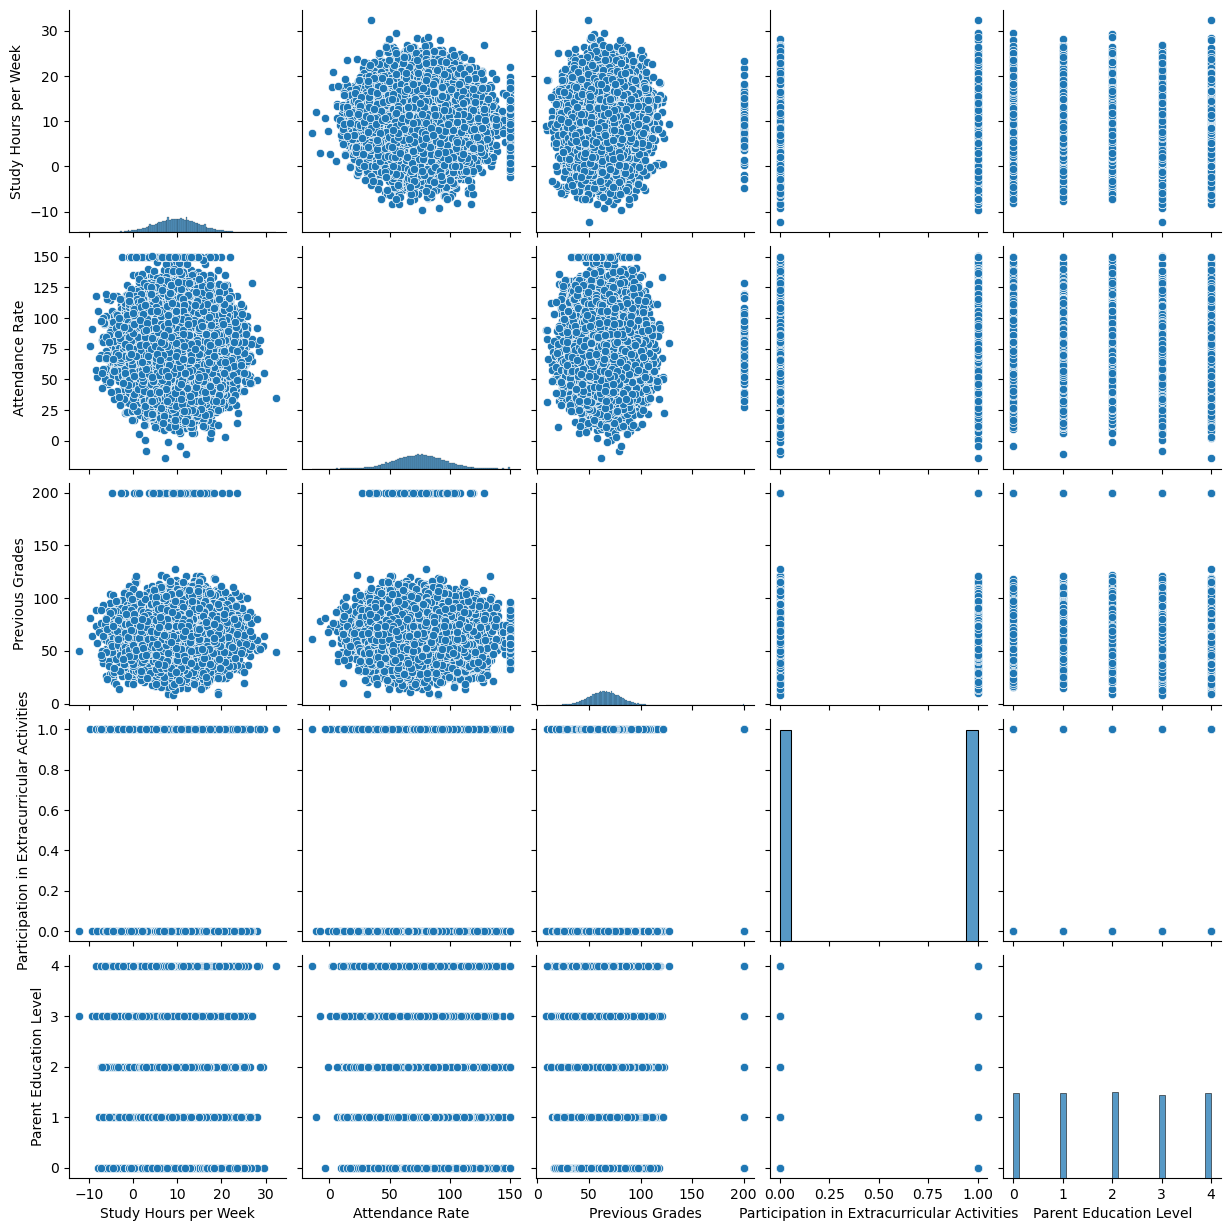

In [18]:
sns.pairplot(df)

In [19]:
df["Parent Education Level"] = df["Parent Education Level"].fillna(df["Parent Education Level"].mode()[0])

In [21]:
df.isnull().sum()

Study Hours per Week                           1905
Attendance Rate                                1888
Previous Grades                                1877
Participation in Extracurricular Activities    1902
Parent Education Level                            0
Passed                                            0
dtype: int64

In [22]:
df["Participation in Extracurricular Activities"].unique()

array([ 1.,  0., nan])

In [23]:
df["Participation in Extracurricular Activities"] = df["Participation in Extracurricular Activities"].fillna(df["Participation in Extracurricular Activities"].mode()[0])

In [25]:
df.isnull().sum()

Study Hours per Week                           1905
Attendance Rate                                1888
Previous Grades                                1877
Participation in Extracurricular Activities       0
Parent Education Level                            0
Passed                                            0
dtype: int64

In [26]:
df["Previous Grades"].unique()

array([ 75. ,  60.6,  64. ,  62.4,  72.7,  69.3,  93.6,  59.2,  91.9,
        72.3,  41.2,  50.4,  49.2,  55.9,  98. ,  51.8,  40.8,  72.4,
        68.6,  98.2,  64.4,  30.7,  58.6,  58.3,  46.5,  56.6,  62.8,
        64.1,  44.3,  74.1,  89.5,  69.2,  81.6,  67.7,  49.3,  69.1,
        57.5,  48.4,  63.8,  77.3,  59.9,  94.1,  79.3,  56.8,  56.3,
        97.2,  60. ,  70.5,  71.3,  39.1,  39.3,   nan,  65.2,  42.3,
        60.1,  68.2,  34.1,  65.8,  66.6,  58. ,  48.5,  59.4,  93.9,
        63.2,  71.4,  70.8,  71.7,  74. ,  43.1,  67.8,  55.7,  63.4,
        64.7,  67.6,  39.8,  74.8,  68.7,  54.1,  52.1,  77. ,  84.6,
        76.5,  26.9,  54.8, 200. ,  49.1,  91.5,  61.8,  52. ,  71.2,
        47.3,  63.3,  58.2,  51. ,  49.5,  45.5,  81.5,  68. ,  55.6,
        87.3,  61.4,  73. ,  86.6,  68.1,  82.4,  73.1,  56.7,  65. ,
        56.4,  48.8,  85.4,  85. ,  44.9,  56.2,  40. ,  82.2,  29. ,
        76.9,  66.9,  80.8,  74.4,  74.2,  78.5,  61.6,  97.8,  63.7,
        47.8,  52.4,

In [27]:
df["Previous Grades"] = df["Previous Grades"].fillna(df["Previous Grades"].median())

In [28]:
df.isnull().sum()

Study Hours per Week                           1905
Attendance Rate                                1888
Previous Grades                                   0
Participation in Extracurricular Activities       0
Parent Education Level                            0
Passed                                            0
dtype: int64

In [30]:
df["Attendance Rate"]

0         NaN
1        95.3
2         NaN
3        76.8
4        89.3
         ... 
39995    93.8
39996    66.4
39997    65.6
39998    74.9
39999    55.1
Name: Attendance Rate, Length: 38000, dtype: float64

In [31]:
df["Attendance Rate"] = df["Attendance Rate"].fillna(df["Attendance Rate"].median())

In [32]:
df.isnull().sum()

Study Hours per Week                           1905
Attendance Rate                                   0
Previous Grades                                   0
Participation in Extracurricular Activities       0
Parent Education Level                            0
Passed                                            0
dtype: int64

In [33]:
df["Study Hours per Week"].unique()

array([ 12.5,   9.3,  13.2,  17.6,   8.8,  17.9,  13.8,   7.7,   0.4,
         1.4,   7.2,   4.9,  11.6,   5.5,   2.9,  17.3,   8.9,  10.3,
         7.3,  10.6,   4.2,  11.9,   7. ,   8.5,  19.3,   9.9,   4.7,
        14.1,   3.9,  11. ,   0.2,   3.4,   nan,  10.9,   9.4,   2.6,
         6.4,  15.3,  11.7,   1.2,   8.1,   6.6,  13.1,  14.7,   5.8,
        14.9,   7.6,   9.1,   4.5,   4. ,  16.8,   9.6,  15. ,  11.8,
         6.8,  17.7,   9.8,  17.8,  -3.1,  10.4,  10.5,   0.1,  17.4,
         6. ,   7.5,  14.6,   7.4,  12.6,  14.8,   6.5,   8.4,   8. ,
         2.7,  11.5,  11.3,  10. ,   7.9,   9.2,  12. ,  19.4,  22.3,
         9. ,  15.7,  14. ,  17. ,   3. ,  12.9,  21. ,   2.2,  12.4,
         5.4,   6.1,   3.8,  11.1,  16.5,   2. ,  13.9,  11.2,   5.1,
        15.8,   5.9,  12.1,   6.2,   5.6,  11.4,  10.1,   8.7,   5.7,
         4.6,  13.6,   2.4,  10.8,  12.8,  15.4,   3.1,   5.3,  29.3,
        13.3,  21.6,   0.7,  13.4,   1.9,  10.2,   6.7,  20.7,  -0.1,
        14.3,   8.3,

In [36]:
df["Study Hours per Week"].min(skipna=True)

-12.3

In [37]:
df["Study Hours per Week"] = df["Study Hours per Week"].fillna(df["Study Hours per Week"].median())

In [38]:
df.isnull().sum()

Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64

In [39]:
df

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,12.5,75.2,75.0,1.0,3.0,Yes
1,9.3,95.3,60.6,0.0,0.0,No
2,13.2,75.2,64.0,0.0,1.0,No
3,17.6,76.8,62.4,1.0,2.0,No
4,8.8,89.3,72.7,0.0,3.0,No
...,...,...,...,...,...,...
39995,15.6,93.8,51.4,1.0,3.0,No
39996,11.3,66.4,64.2,0.0,4.0,Yes
39997,13.1,65.6,38.1,0.0,2.0,No
39998,14.1,74.9,65.2,1.0,3.0,No


In [40]:
X, y = df.drop(columns=["Passed"]), df["Passed"]

In [41]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
classifier = LogisticRegression().fit(train_X, train_y)

In [43]:
pred_y = classifier.predict(test_X)

In [44]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

          No       0.51      0.42      0.46      3839
         Yes       0.50      0.58      0.54      3761

    accuracy                           0.50      7600
   macro avg       0.50      0.50      0.50      7600
weighted avg       0.50      0.50      0.50      7600



In [45]:
classifier = KNeighborsClassifier().fit(train_X, train_y)

In [46]:
pred_y = classifier.predict(test_X)

In [47]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

          No       0.51      0.50      0.51      3839
         Yes       0.50      0.51      0.50      3761

    accuracy                           0.50      7600
   macro avg       0.50      0.50      0.50      7600
weighted avg       0.50      0.50      0.50      7600



In [48]:
classifier = DecisionTreeClassifier().fit(train_X, train_y)

In [49]:
pred_y = classifier.predict(test_X)

In [ ]:
print(classification_report(test_y, pred_y))    

              precision    recall  f1-score   support

          No       0.51      0.49      0.50      3839
         Yes       0.50      0.51      0.50      3761

    accuracy                           0.50      7600
   macro avg       0.50      0.50      0.50      7600
weighted avg       0.50      0.50      0.50      7600



In [51]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier().fit(train_X, train_y)

In [52]:
pred_y = classifier.predict(test_X)

In [53]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

          No       0.50      0.42      0.45      3839
         Yes       0.49      0.57      0.53      3761

    accuracy                           0.49      7600
   macro avg       0.49      0.49      0.49      7600
weighted avg       0.49      0.49      0.49      7600

